In [ ]:
import numpy as np
import matplotlib.pylab as pylab
from PIL import Image, ImageEnhance
from skimage import data, exposure, io
from skimage.exposure import histogram, cumulative_distribution
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.util import img_as_float




 # **5.1 Contrast Stretching** ⭐

---



#Task 1:

Create a plot with 2 by 2 images that has the following:

1) Input Image

2) Histogram of Input Image

3) Output Image after applying Contrast stretching with PIL as a point operation

4) Histogram of Output


**If the color intensity is less than 40 make it black, if it’s more than 200 make it white, otherwise keep the color intensity as it is.**



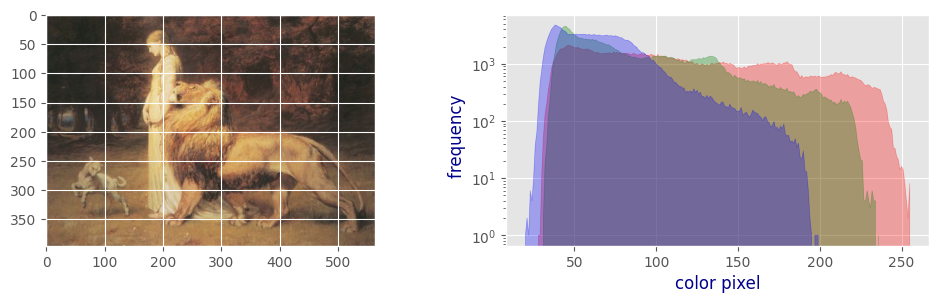

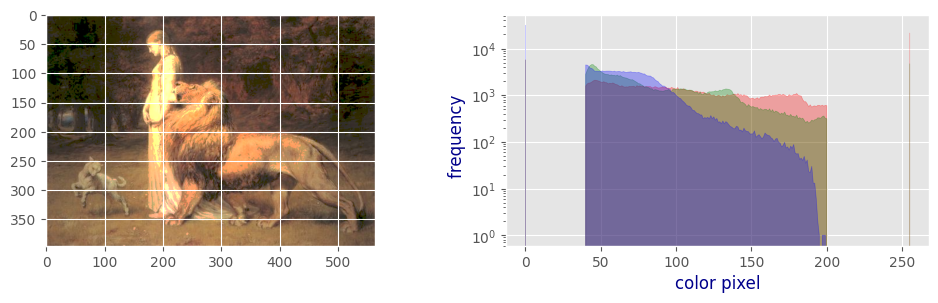

In [ ]:
#Fun takes an image as input then to display the image
def plot_image(image):
    pylab.imshow(image)

#Fun plot_hist takes the red, green, and blue channels of an image separately as inputs -> computes the histogram -> fills the area under the histogram curve
def plot_hist(im_r, im_g, im_b):
    for im, color in zip([im_r, im_g, im_b], ['red', 'green', 'blue']):
        hist, bins = histogram(im)
        pylab.fill_between(bins, hist, color=color, alpha=0.3)
        pylab.xlabel('color pixel', color='#00008B')
        pylab.ylabel('frequency  ', color='#00008B')

im = Image.open('/content/leotar.jpg')
pylab.style.use('ggplot')
pylab.figure(figsize=(12, 3))

# Display the original image
pylab.subplot(121)
plot_image(im)

# Splits the original image into its red, green, and blue channels
pylab.subplot(122)
im_r, im_g, im_b = im.split()
# Convert Image channels to arrays for histogram computation
im_r_array = np.array(im_r)
im_g_array = np.array(im_g)
im_b_array = np.array(im_b)
plot_hist(im_r_array, im_g_array, im_b_array)
# غيرته عشان أقارن اذا صح أو لا
pylab.yscale('log', base=10)
pylab.show()

# Function to adjust contrast, less than 40 will be black, more than 200 will be white, else will be same as it is -> c
def contrast(c):
    return 0 if c < 40 else (255 if c > 200 else c)

# Apply contrast stretching
im1 = im.point(contrast)
im_r1, im_g1, im_b1 = im1.split()
# Convert Image channels to arrays for histogram computation
im_r1_array = np.array(im_r1)
im_g1_array = np.array(im_g1)
im_b1_array = np.array(im_b1)

pylab.figure(figsize=(12, 3))
pylab.subplot(121), plot_image(im1)
pylab.subplot(122), plot_hist(im_r1_array, im_g1_array, im_b1_array), pylab.yscale('log', base=10)
pylab.show()

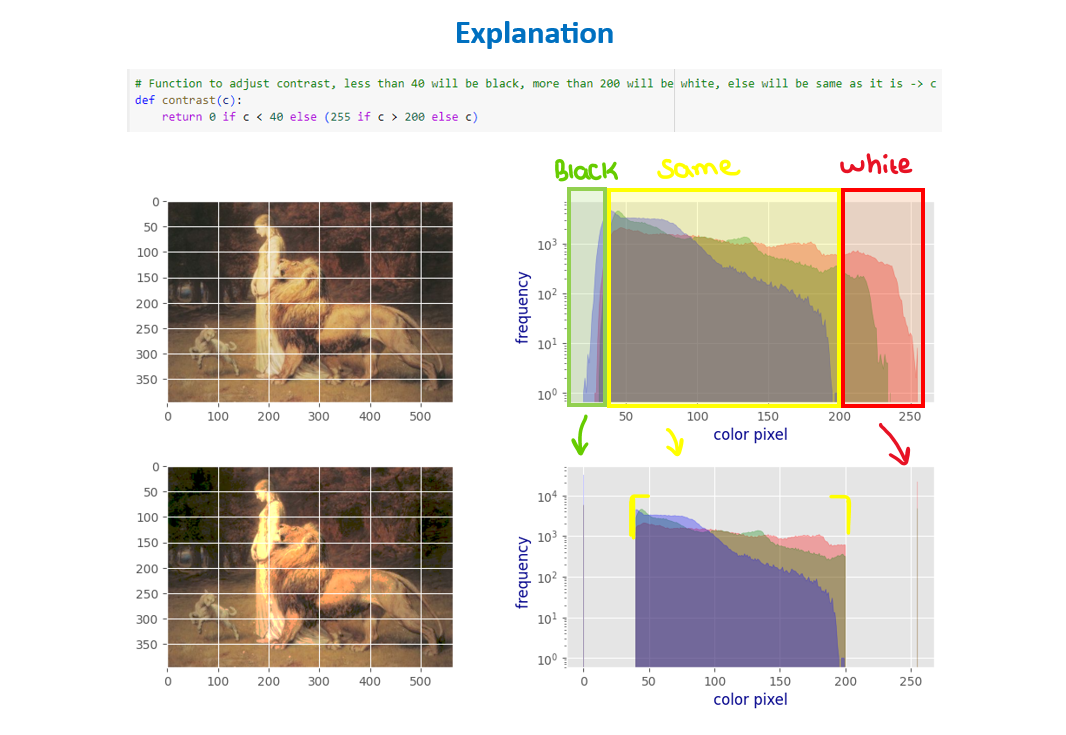

#Task 2:

Create a plot with 2 by 2 images that has the following:

1) Input Image

2) Histogram of Input Image

3) Output Image after applying Contrast stretching Using the PIL ImageEnhance module

4) Histogram of Output

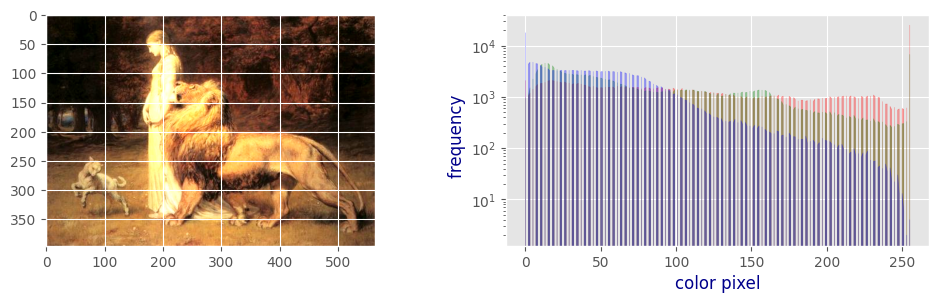

In [ ]:
# Apply Contrast stretching using the PIL ImageEnhance module
contrast = ImageEnhance.Contrast(im)
# Increases the contrast of the image by a factor of 1.6.
im1 = np.reshape(np.array(contrast.enhance(1.6).getdata()).astype(np.uint8), (im.height, im.width, 3))

pylab.style.use('ggplot')
pylab.figure(figsize=(12, 3))
pylab.subplot(121), plot_image(im1)
# R, G, and B channels
pylab.subplot(122), plot_hist(im1[..., 0], im1[..., 1], im1[..., 2]), pylab.yscale('log', base=10)
pylab.show()


# **5.2 Thresholding and Half Toning** ⭐


---



#Task 1:

Create a plot with 2 by 3 images after applying Thresholding with these fixed values of threshold (0, 60, 120, 180, 240, and 300).



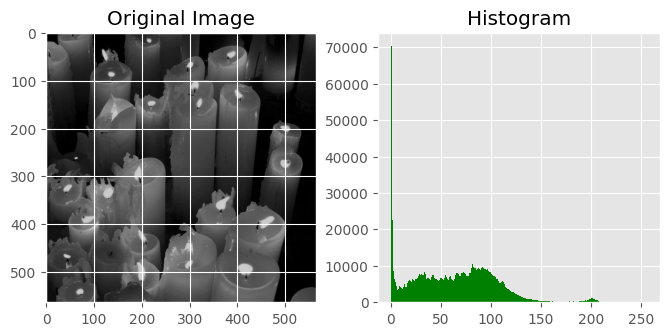

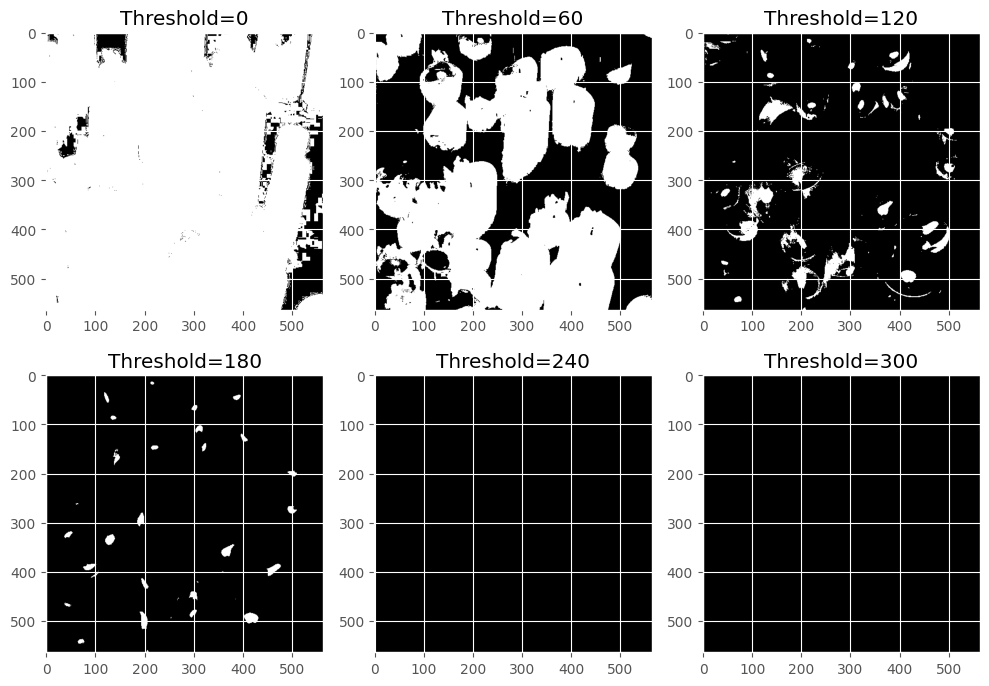

In [ ]:
import matplotlib.pyplot as plt
# Define the plot_image function for displaying images with titles
def plot_image(image, title=None):
    plt.imshow(image, cmap='gray')
    plt.title(title)

im = Image.open('/content/candels.jpg')

plt.figure(figsize=(8, 3.5))
plt.subplot(1, 2, 1)
plot_image(im, 'Original Image')
plt.subplot(1, 2, 2)
plt.hist(np.array(im).ravel(), bins=256, range=(0, 256), color='g')
plt.title('Histogram')

# Prepare for thresholding demonstration
plt.figure(figsize=(10, 7))

# Threshold values for demonstration
th = [0, 60, 120, 180, 240, 300]

# Apply thresholding and display images
for i, threshold in enumerate(th, start=1):
    im1 = im.point(lambda x: 255 if x > threshold else 0)
    plt.subplot(2, 3, i), plot_image(im1, f'Threshold={threshold}')

plt.tight_layout()
plt.show()

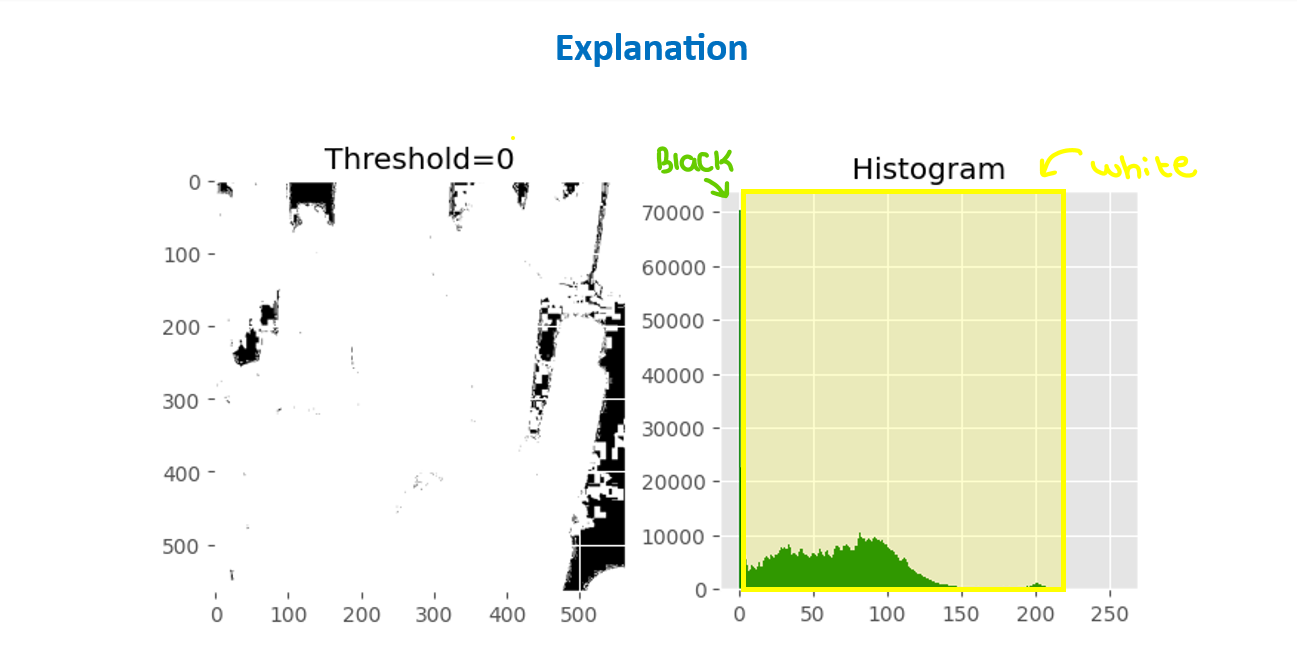
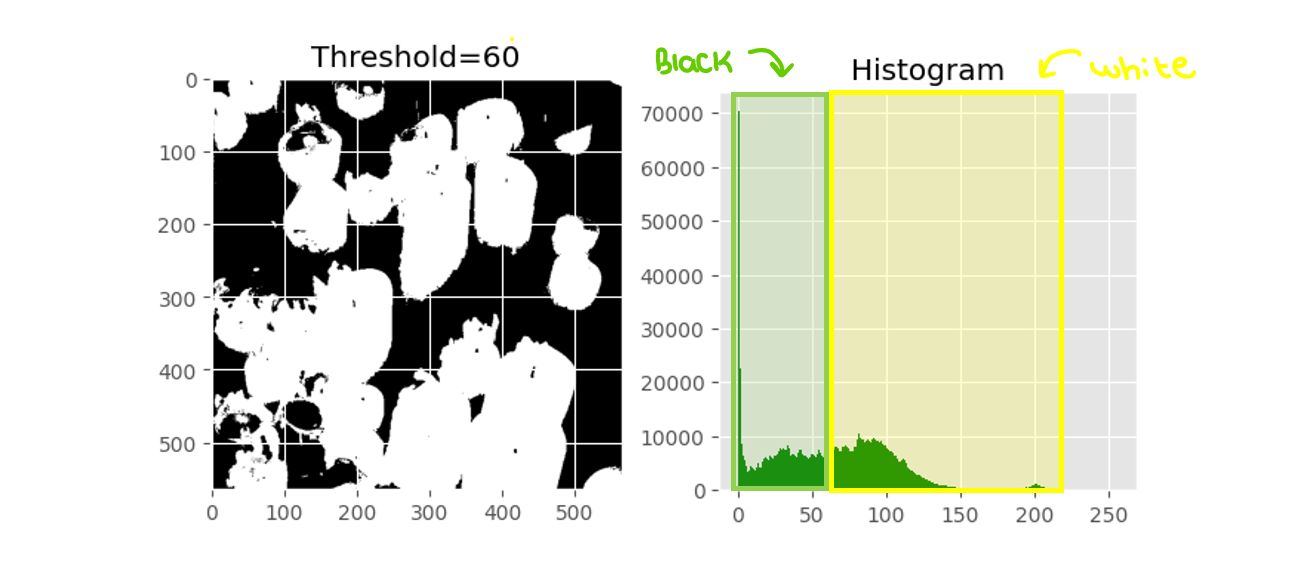
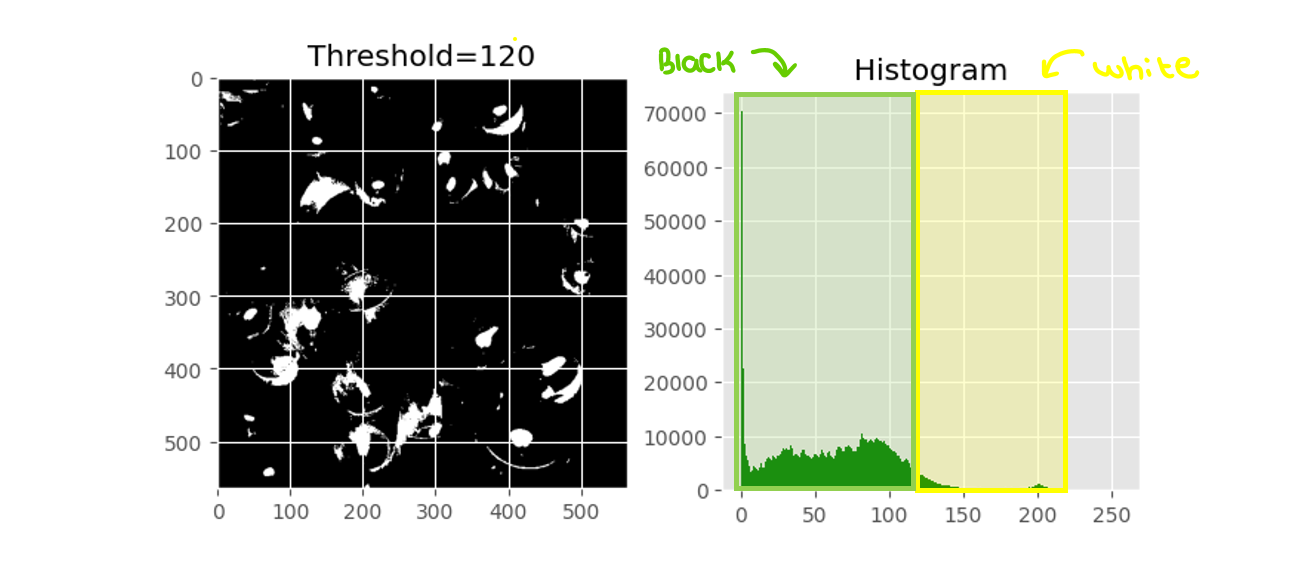
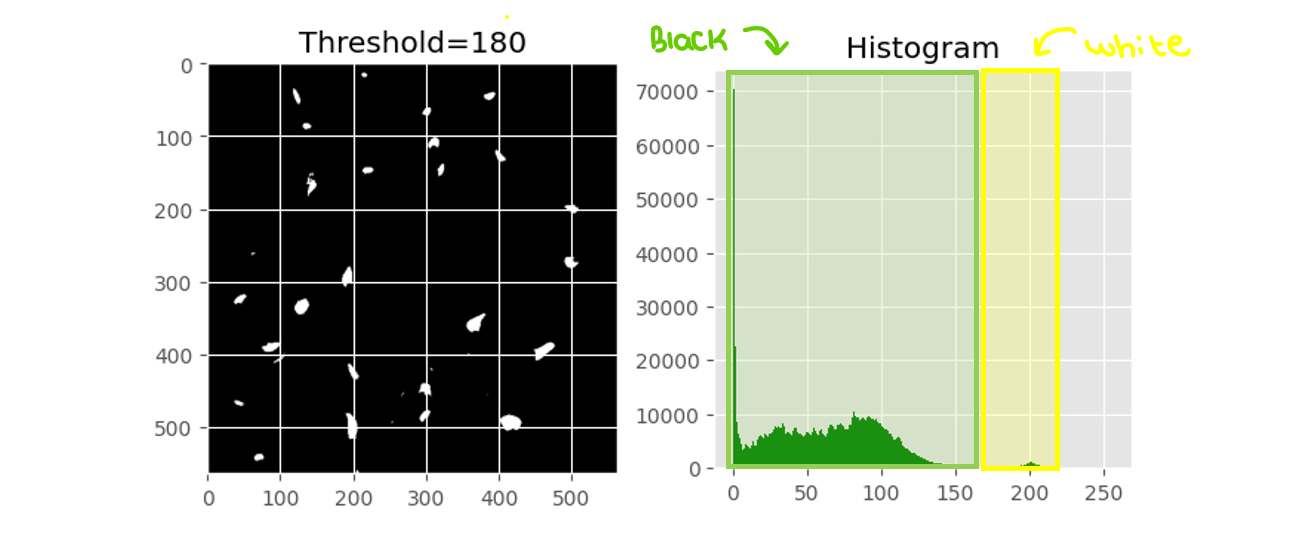
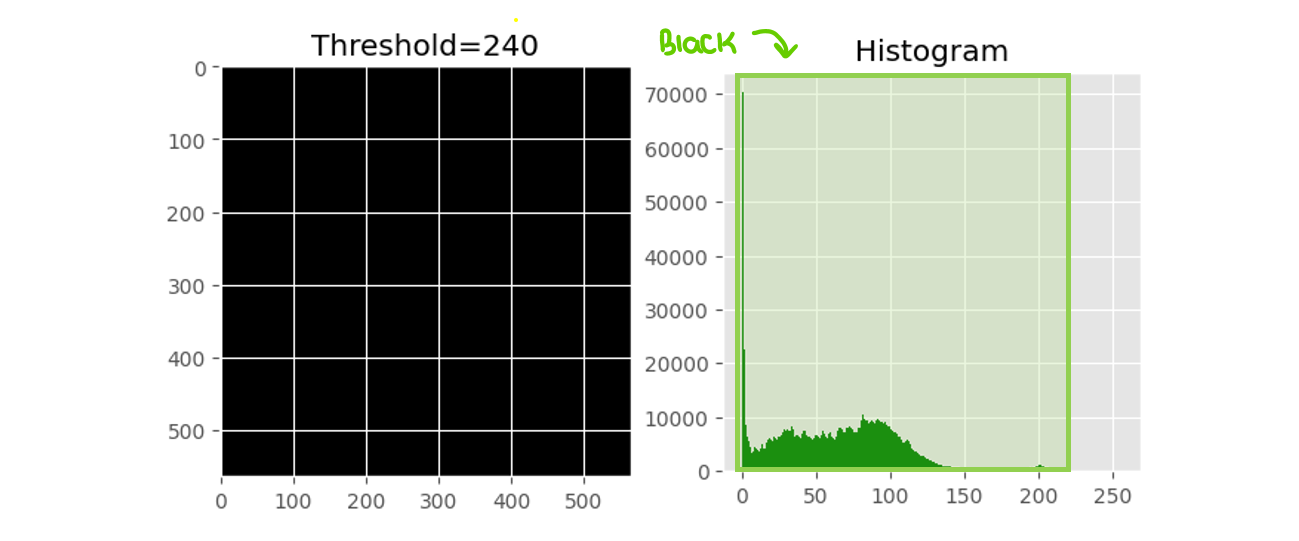
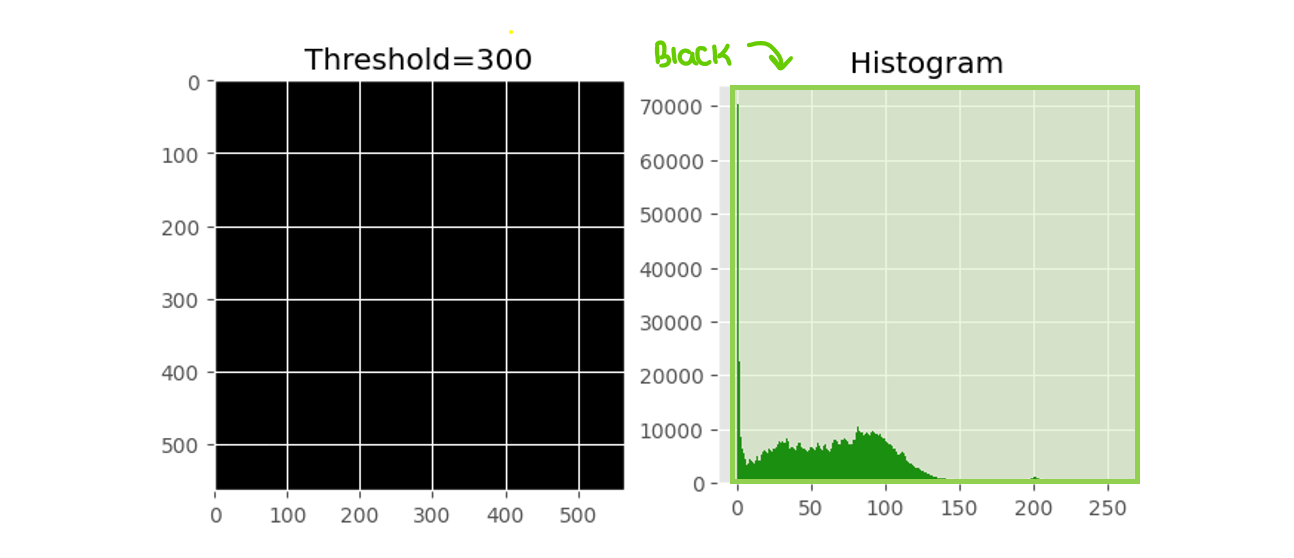

#Task 2:

Create a plot with 2 by 3 images after applying half toning with these fixed values of threshold (0, 60, 120, 180, 240, and 300).

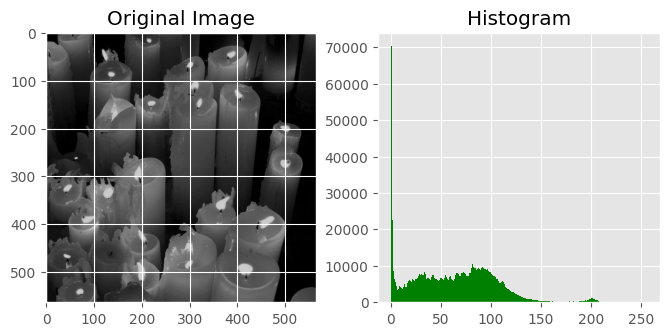

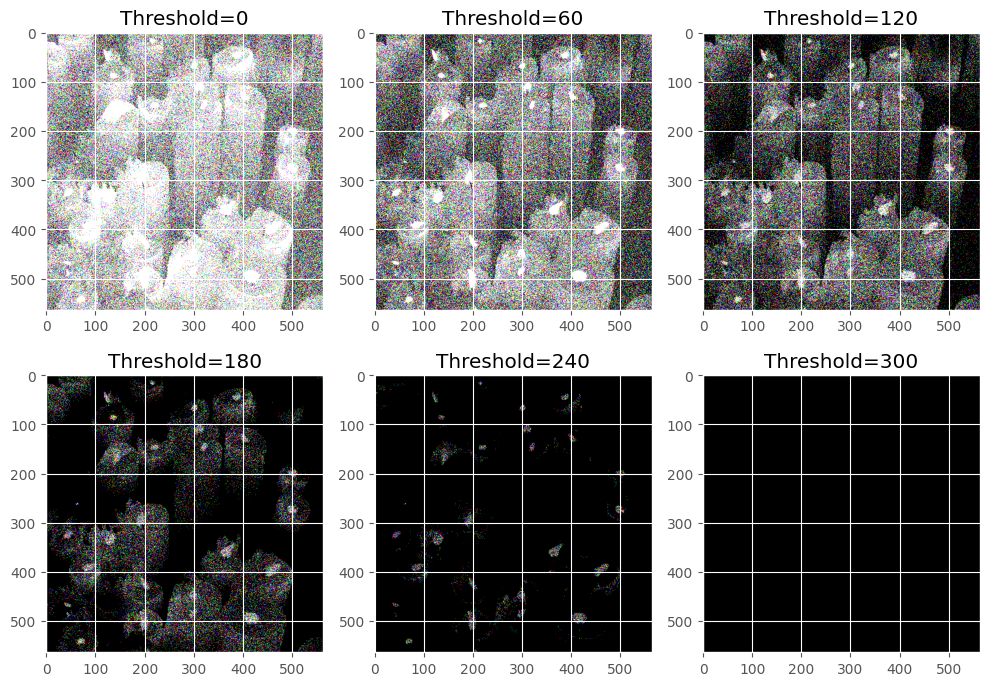

In [ ]:
#same as above but with adding noise فقط


# Function to plot images
def plot_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)

# Load the image
im = Image.open("candels.jpg")

im_with_noise = Image.fromarray(np.clip(np.array(im) + np.random.randint(-128, 128, size=(im.height, im.width, 3)), 0, 255).astype(np.uint8))

plt.figure(figsize=(8, 3.5))
plt.subplot(1, 2, 1)
plot_image(im, 'Original Image')
plt.subplot(1, 2, 2)
plt.hist(np.array(im).ravel(), bins=256, range=(0, 256), color='g')
plt.title('Histogram')

# Prepare for displaying thresholded images
plt.figure(figsize=(10, 7))

# Threshold values for demonstration
th = [0, 60, 120, 180, 240, 300]

# Display thresholded images
for i, threshold in enumerate(th, start=1):
    im1 = im_with_noise.point(lambda x: 255 if x > threshold else 0)
    plt.subplot(2, 3, i)
    plot_image(im1, f'Threshold={threshold}')

plt.tight_layout()
plt.show()

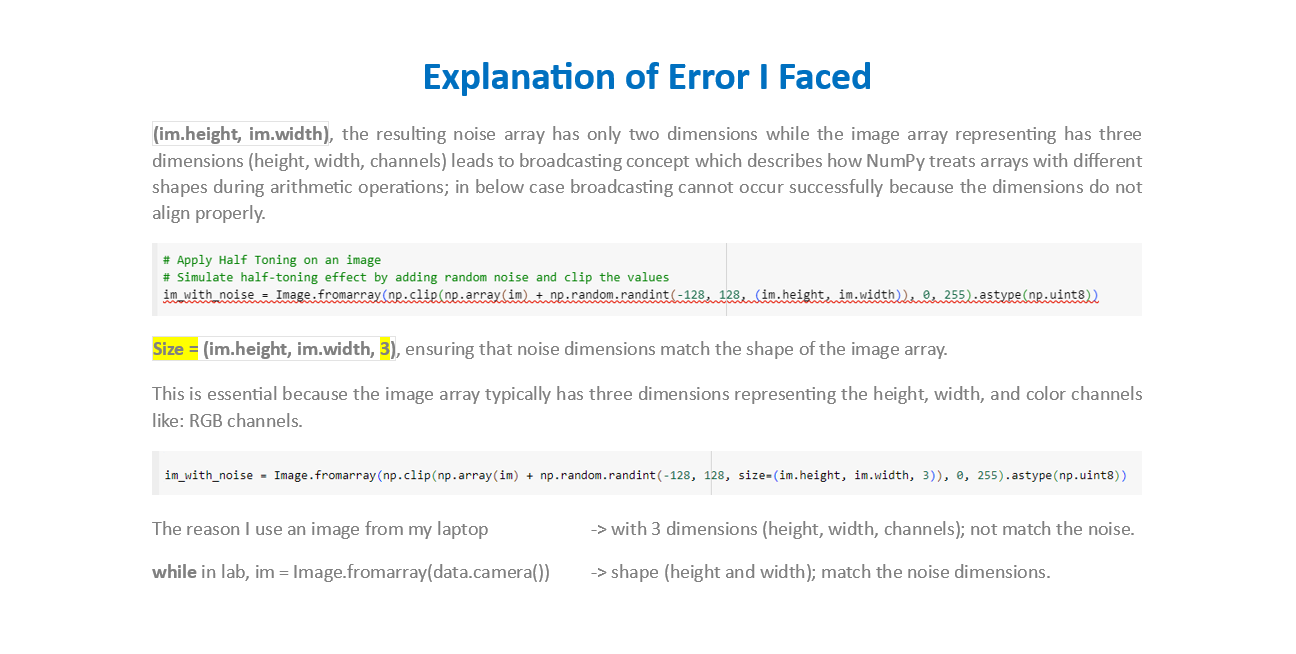


# **5.3 Contrast Stretching, Histogram Equalization and Histogram Matching** ⭐


---



# Task 1:
Improve the contrast in the low contrast image in figure 1 (attached in BB).



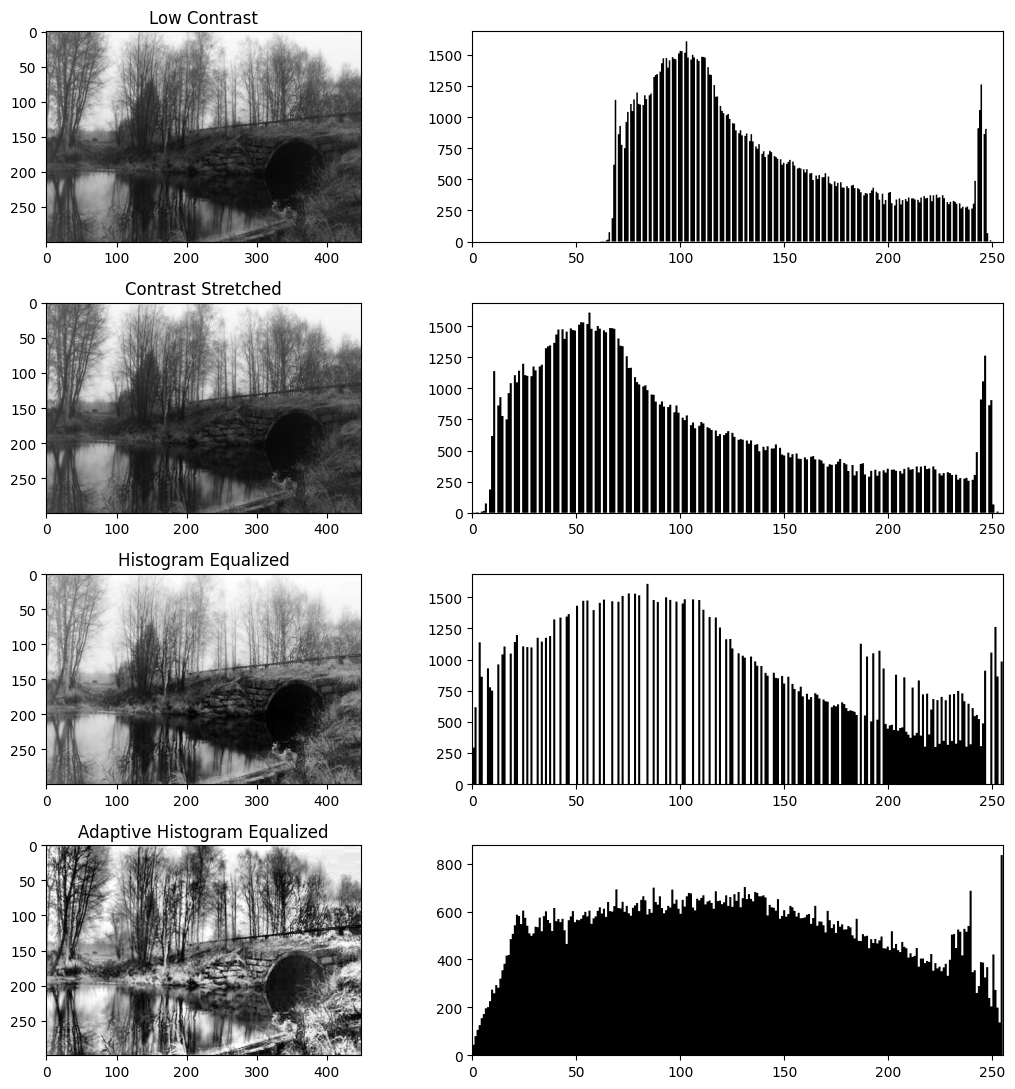

In [ ]:
def plot_image_and_hist(image, axes, title, bins=256):
    axes_image, axes_hist = axes

    # Display the image
    axes_image.imshow(image, cmap='gray')
    axes_image.set_title(title)

    # Plot histogram for grayscale image
    axes_hist.hist(image.ravel() * 255, bins=bins, color='black', histtype='stepfilled')
    axes_hist.set_xlim(0, 255)

# Load your image
im = imread('/content/fig1.jpeg')
im = img_as_float(im)

# Assuming the image might be in color, let's first convert it to grayscale for simplicity
if im.shape[-1] == 4:
    im = im[..., :3]

im_gray = rgb2gray(im)

# Apply contrast stretching -> Range for the color, below not sure 100% about the benefit
# Intensity values in the range [0, 50] will be mapped to [0, 255].
# Intensity values in the range (50, 100] will be linearly scaled between [0, 255].
# Intensity values above 100 will be mapped to 255.
p1, p2 = np.percentile(im_gray, (0, 100))
im_rescale = exposure.rescale_intensity(im_gray, in_range=(p1, p2))

# Apply histogram equalization
im_eq = exposure.equalize_hist(im_gray)

# Apply adaptive histogram equalization, nooo missing -> dark and the frequency will be more
im_adapteq = exposure.equalize_adapthist(im_gray, clip_limit=0.03)

# Prepare figures
fig, axes = pylab.subplots(nrows=4, ncols=2, figsize=(11, 11))
titles = ['Low Contrast', 'Contrast Stretched', 'Histogram Equalized', 'Adaptive Histogram Equalized']
images = [im_gray, im_rescale, im_eq, im_adapteq]

for ax, img, title in zip(axes, images, titles):
    plot_image_and_hist(img, ax, title)

pylab.tight_layout()
pylab.show()

#Task 2:
Make the image in figure 2 match the histogram of the reference image in figure 3 (both images are attached in BB).

<Figure size 640x480 with 0 Axes>

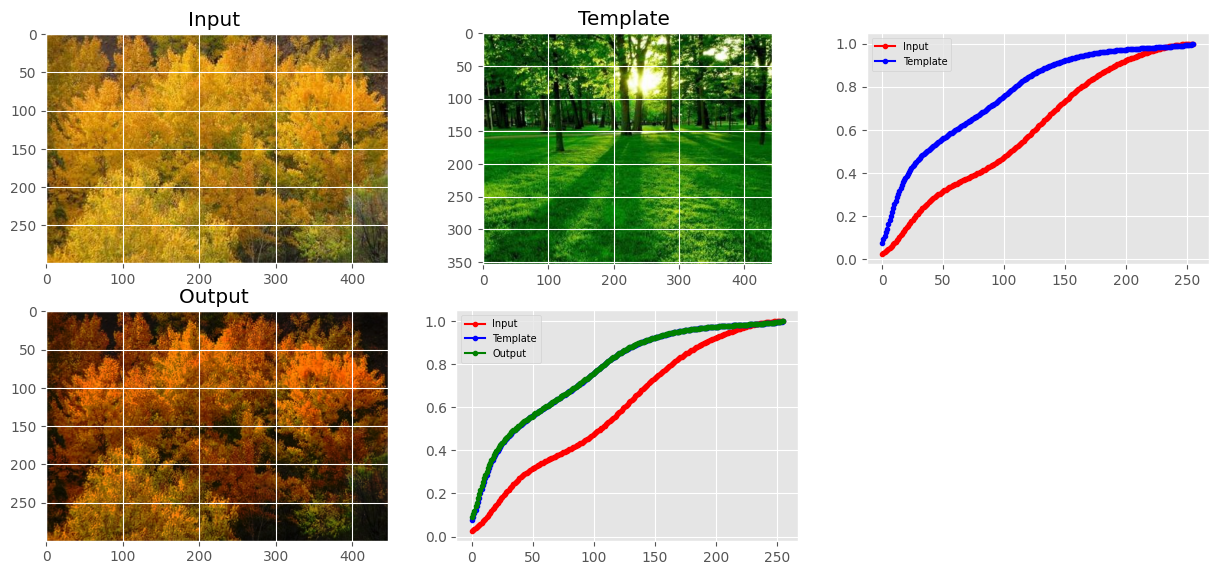

In [ ]:
import matplotlib.pylab as pylab

# Computes the CDF of an image
def cdf(im):
    c, b = cumulative_distribution(im)
    c = np.insert(c, 0, [0]*int(b[0]))
    c = np.append(c, [1]*(255-int(b[-1])))
    return c

# Performs histogram matching
def hist_matching(c, c_t, im):
    pixels = np.arange(256)
    new_pixels = np.interp(c, c_t, pixels)
    im = np.reshape(new_pixels[im.ravel()], im.shape).astype(np.uint8)
    return im

im = imread('/content/fig2.jpeg')
im_t = imread('/content/fig3.jpeg')

pylab.gray()
pylab.figure(figsize=(15, 6.6))
pylab.subplot(2, 3, 1), plot_image(im, 'Input ')
pylab.subplot(2, 3, 2), plot_image(im_t, 'Template ')

# Compute CDF for input and template images
c = cdf(im)
c_t = cdf(im_t)

# Plot CDFs
pylab.subplot(2, 3, 3)
p = np.arange(256)
pylab.plot(p, c, 'r.-', label='Input')
pylab.plot(p, c_t, 'b.-', label='Template')
pylab.legend(prop={'size': 7})

# Perform histogram matching !!!!!!! the important part -> c_tبس ماتش للصوره
im_matched = hist_matching(c, c_t, im)
pylab.subplot(2, 3, 4), plot_image(im_matched, 'Output ')

# Compute and plot CDF for the output image
c1 = cdf(im_matched)
pylab.subplot(2, 3, 5)
pylab.plot(np.arange(256), c, 'r.-', label='Input')
pylab.plot(np.arange(256), c_t, 'b.-', label='Template')
pylab.plot(np.arange(256), c1, 'g.-', label='Output')
pylab.legend(prop={'size': 7})
pylab.show()

# EXTRA!
# CDF stands for Cumulative Distribution Function. In image processing and statistics,
# The Cumulative Distribution Function (CDF) is a function that gives the probability
# That a random variable (in this case, pixel intensities in an image) will take on a value less than or equal to a given value.